In [10]:
%load_ext autoreload
%autoreload 2

import vix_calc
import sqlite3
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import vix_calc_other
import vix_calc_functions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
DT = '2023-03-31'
data_raw = vix_calc.query_date(DT)
df = pd.DataFrame.from_dict(data_raw)

In [12]:
vix_calc.main(DT)

18.766888077896425

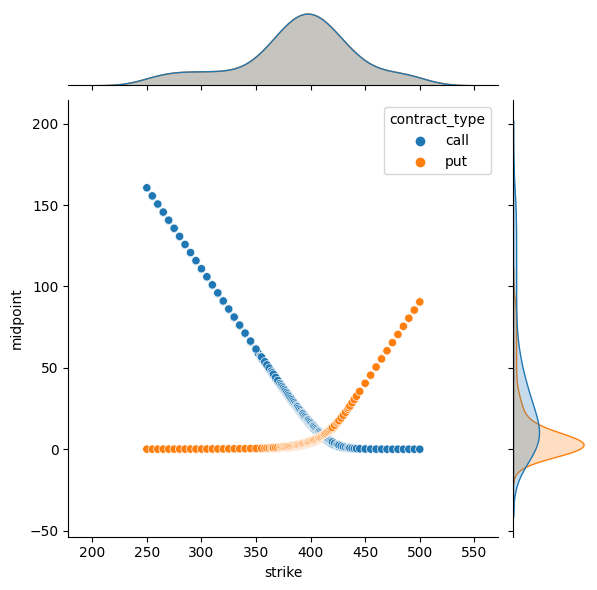

In [13]:
sns.jointplot(data=df, x='strike', y='midpoint', hue='contract_type');

In [19]:
ci,pi = vix_calc_other.select_options(data_raw, moneyness=vix_calc_functions.in_the_money)

In [37]:
rr = pd.DataFrame.from_dict(ci + pi)
rr = rr[rr.exp_date == '2023-04-28'].copy()
rr.head()

,symbol,contract_type,strike,bid,midpoint,ask,obs_date,exp_date,stock_price
0,SPY,call,409.0,8.49,8.50,8.51,2023-03-31,2023-04-28,409.39
2,SPY,call,408.0,9.12,9.13,9.14,2023-03-31,2023-04-28,409.39
4,SPY,call,407.5,9.44,9.46,9.47,2023-03-31,2023-04-28,409.39
6,SPY,call,407.0,9.77,9.78,9.79,2023-03-31,2023-04-28,409.39
8,SPY,call,406.0,10.44,10.46,10.47,2023-03-31,2023-04-28,409.39


In [38]:
rr['intr'] = rr.apply((lambda x: vix_calc_other.get_intrisic_price(dict(x))), axis=1)

In [51]:
rr.to_csv("Check This.csv")

In [62]:
rr['uncert'] = rr.midpoint - rr['intr']

In [63]:
rr[(rr.uncert < 1) & (rr.uncert > -1)]

,symbol,contract_type,strike,bid,midpoint,ask,obs_date,exp_date,stock_price,intr,uncert
173,SPY,put,424.0,15.26,15.42,15.57,2023-03-31,2023-04-28,409.39,14.61,0.81
175,SPY,put,425.0,16.06,16.22,16.38,2023-03-31,2023-04-28,409.39,15.61,0.61
177,SPY,put,426.0,16.89,17.06,17.22,2023-03-31,2023-04-28,409.39,16.61,0.45
179,SPY,put,428.0,18.61,18.80,18.99,2023-03-31,2023-04-28,409.39,18.61,0.19
181,SPY,put,430.0,20.41,20.64,20.86,2023-03-31,2023-04-28,409.39,20.61,0.03
183,SPY,put,432.0,22.31,22.55,22.79,2023-03-31,2023-04-28,409.39,22.61,-0.06
185,SPY,put,434.0,24.46,24.54,24.61,2023-03-31,2023-04-28,409.39,24.61,-0.07
187,SPY,put,435.0,25.46,25.53,25.60,2023-03-31,2023-04-28,409.39,25.61,-0.08
189,SPY,put,436.0,26.45,26.52,26.60,2023-03-31,2023-04-28,409.39,26.61,-0.09
191,SPY,put,438.0,28.45,28.52,28.59,2023-03-31,2023-04-28,409.39,28.61,-0.09


<AxesSubplot: xlabel='strike', ylabel='uncert'>

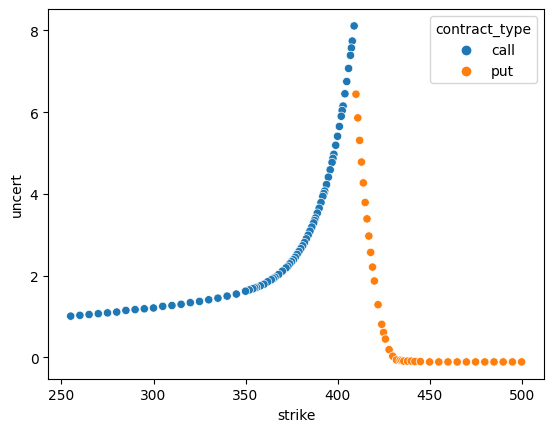

In [54]:
sns.scatterplot(data=rr, x='strike', y='uncert', hue='contract_type')

In [55]:
rr.uncert.sum()

277.8200000000005

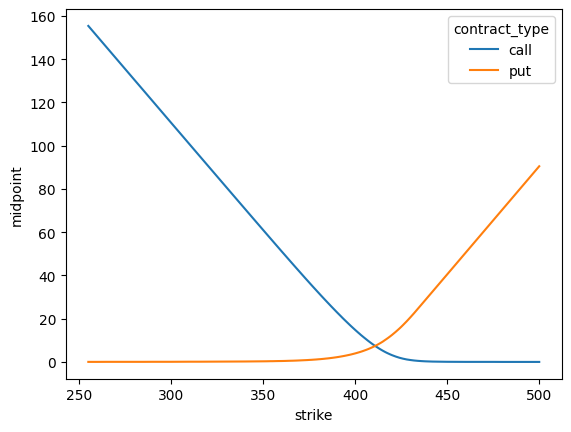

In [14]:
sns.lineplot(data=df.loc[df.exp_date=='2023-04-28'], x='strike', y='midpoint', hue='contract_type');

In [56]:
calls, puts = vix_calc.select_options(data_raw)
df_clean = pd.DataFrame.from_dict(calls + puts)
df_clean.head(3)

,symbol,contract_type,strike,bid,midpoint,ask,obs_date,exp_date,stock_price
0,SPY,call,410.0,7.88,7.89,7.90,2023-03-31,2023-04-28,409.39
1,SPY,call,410.0,9.45,9.46,9.48,2023-03-31,2023-05-05,409.39
2,SPY,call,411.0,7.29,7.30,7.31,2023-03-31,2023-04-28,409.39


In [61]:
df_clean.midpoint.sum()

478.40999999999997

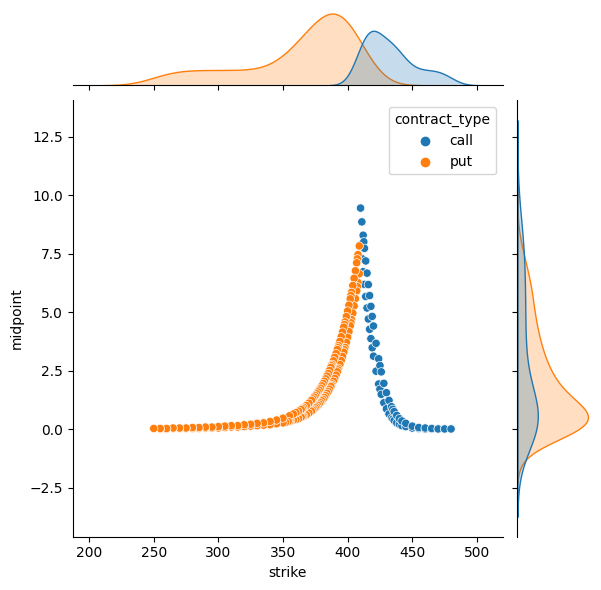

In [7]:
sns.jointplot(data=df_clean, x='strike', y='midpoint', hue='contract_type');

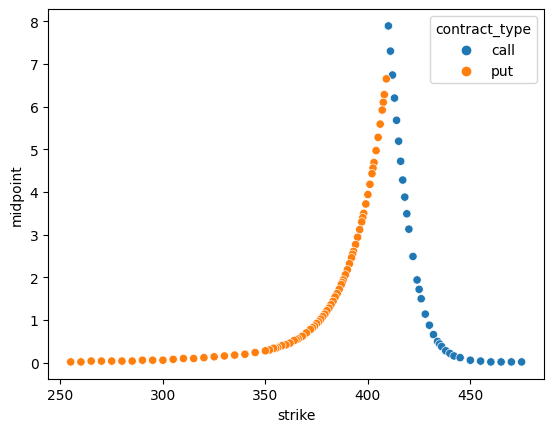

In [8]:
sns.scatterplot(data=df_clean.loc[df_clean.exp_date=='2023-04-28'], x='strike', y='midpoint', hue='contract_type');

## Method

### Calc Intrinsic spot value

In [57]:
data = df[df.exp_date == min(df.exp_date)].copy()
data.head(4)

,symbol,contract_type,strike,bid,midpoint,ask,obs_date,exp_date,stock_price
0,SPY,call,255.0,155.24,155.40,155.55,2023-03-31,2023-04-28,409.39
1,SPY,call,260.0,150.26,150.42,150.57,2023-03-31,2023-04-28,409.39
2,SPY,call,265.0,145.28,145.44,145.59,2023-03-31,2023-04-28,409.39
3,SPY,call,270.0,140.31,140.46,140.61,2023-03-31,2023-04-28,409.39


In [58]:
def get_intrisic_price(row):
    if row.contract_type == 'call':
        return row.stock_price - row.strike
    else:
        return row.strike - row.stock_price

data['in_price'] = data.apply(get_intrisic_price, axis=1)

In [56]:
data[(data.strike > 400) & (data.strike < 420)]

,symbol,contract_type,strike,bid,midpoint,ask,obs_date,exp_date,stock_price,in_price
64,SPY,call,401.0,13.90,14.04,14.18,2023-03-31,2023-04-28,409.39,8.39
65,SPY,call,402.0,13.15,13.29,13.43,2023-03-31,2023-04-28,409.39,7.39
66,SPY,call,402.5,12.80,12.93,13.06,2023-03-31,2023-04-28,409.39,6.89
67,SPY,call,403.0,12.42,12.54,12.67,2023-03-31,2023-04-28,409.39,6.39
68,SPY,call,404.0,11.83,11.84,11.86,2023-03-31,2023-04-28,409.39,5.39
69,SPY,call,405.0,11.13,11.14,11.15,2023-03-31,2023-04-28,409.39,4.39
70,SPY,call,406.0,10.44,10.46,10.47,2023-03-31,2023-04-28,409.39,3.39
71,SPY,call,407.0,9.77,9.78,9.79,2023-03-31,2023-04-28,409.39,2.39
72,SPY,call,407.5,9.44,9.46,9.47,2023-03-31,2023-04-28,409.39,1.89
73,SPY,call,408.0,9.12,9.13,9.14,2023-03-31,2023-04-28,409.39,1.39


In [59]:
data['risk'] = data.midpoint - data.in_price

In [44]:
money = data[data.in_price>=0].copy()
money['risk'] = money.midpoint - money.in_price

In [47]:
money[money.contract_type=='put']

,symbol,contract_type,strike,bid,midpoint,ask,obs_date,exp_date,stock_price,in_price,risk
186,SPY,put,410.0,7.04,7.05,7.06,2023-03-31,2023-04-28,409.39,0.61,6.44
187,SPY,put,411.0,7.46,7.47,7.48,2023-03-31,2023-04-28,409.39,1.61,5.86
188,SPY,put,412.0,7.91,7.92,7.93,2023-03-31,2023-04-28,409.39,2.61,5.31
189,SPY,put,413.0,8.38,8.39,8.40,2023-03-31,2023-04-28,409.39,3.61,4.78
190,SPY,put,414.0,8.87,8.88,8.89,2023-03-31,2023-04-28,409.39,4.61,4.27
191,SPY,put,415.0,9.39,9.40,9.42,2023-03-31,2023-04-28,409.39,5.61,3.79
192,SPY,put,416.0,9.91,10.00,10.08,2023-03-31,2023-04-28,409.39,6.61,3.39
193,SPY,put,417.0,10.48,10.58,10.67,2023-03-31,2023-04-28,409.39,7.61,2.97
194,SPY,put,418.0,11.09,11.18,11.28,2023-03-31,2023-04-28,409.39,8.61,2.57
195,SPY,put,419.0,11.71,11.82,11.92,2023-03-31,2023-04-28,409.39,9.61,2.21


In [70]:
df_clean

,symbol,contract_type,strike,bid,midpoint,ask,obs_date,exp_date,stock_price
0,SPY,call,410.0,7.88,7.89,7.90,2023-03-31,2023-04-28,409.39
1,SPY,call,410.0,9.45,9.46,9.48,2023-03-31,2023-05-05,409.39
2,SPY,call,411.0,7.29,7.30,7.31,2023-03-31,2023-04-28,409.39
3,SPY,call,411.0,8.86,8.87,8.88,2023-03-31,2023-05-05,409.39
4,SPY,call,412.0,6.73,6.74,6.75,2023-03-31,2023-04-28,409.39
...,...,...,...,...,...,...,...,...,...
207,SPY,put,260.0,0.02,0.02,0.03,2023-03-31,2023-04-28,409.39
208,SPY,put,260.0,0.04,0.04,0.05,2023-03-31,2023-05-05,409.39
209,SPY,put,255.0,0.02,0.02,0.03,2023-03-31,2023-04-28,409.39
210,SPY,put,255.0,0.04,0.04,0.05,2023-03-31,2023-05-05,409.39


In [67]:
df_clean.midpoint.sum() / 409.39

1.1685922958548083

In [107]:
d2 = data[(data.risk < 50) & data.risk > 0]
d2

,symbol,contract_type,strike,bid,midpoint,ask,obs_date,exp_date,stock_price,in_price,risk
0,SPY,call,255.0,155.24,155.40,155.55,2023-03-31,2023-04-28,409.39,154.39,1.01
1,SPY,call,260.0,150.26,150.42,150.57,2023-03-31,2023-04-28,409.39,149.39,1.03
2,SPY,call,265.0,145.28,145.44,145.59,2023-03-31,2023-04-28,409.39,144.39,1.05
3,SPY,call,270.0,140.31,140.46,140.61,2023-03-31,2023-04-28,409.39,139.39,1.07
4,SPY,call,275.0,135.33,135.48,135.64,2023-03-31,2023-04-28,409.39,134.39,1.09
...,...,...,...,...,...,...,...,...,...,...,...
217,SPY,put,480.0,70.43,70.50,70.58,2023-03-31,2023-04-28,409.39,70.61,-0.11
218,SPY,put,485.0,75.43,75.50,75.58,2023-03-31,2023-04-28,409.39,75.61,-0.11
219,SPY,put,490.0,80.43,80.50,80.57,2023-03-31,2023-04-28,409.39,80.61,-0.11
220,SPY,put,495.0,85.43,85.50,85.57,2023-03-31,2023-04-28,409.39,85.61,-0.11


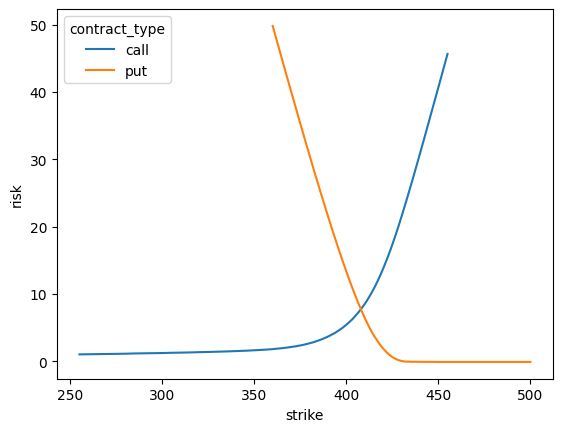

In [108]:
sns.lineplot(data=d2, x='strike', y='risk', hue='contract_type');

In [9]:
data

NameError: name 'data' is not defined

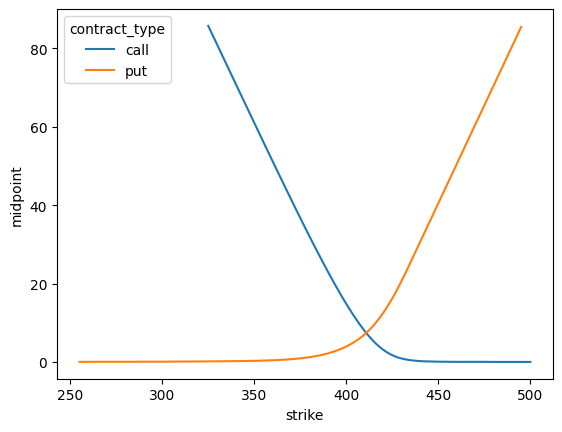

In [90]:
d = data[data.midpoint < 90]
sns.lineplot(data=d, x='strike', y='midpoint', hue='contract_type');

<AxesSubplot: xlabel='strike'>

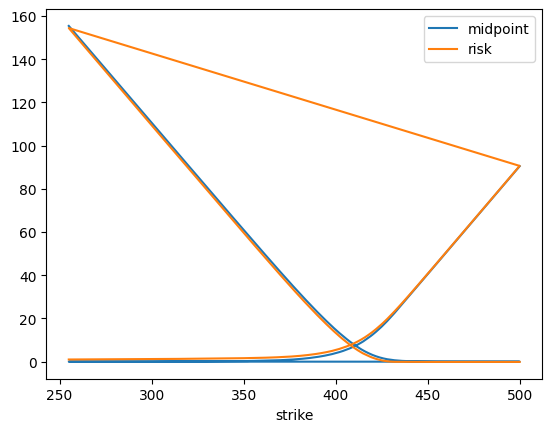

In [69]:
data.plot(x='strike', y=['midpoint', 'risk'])

<AxesSubplot: xlabel='strike'>

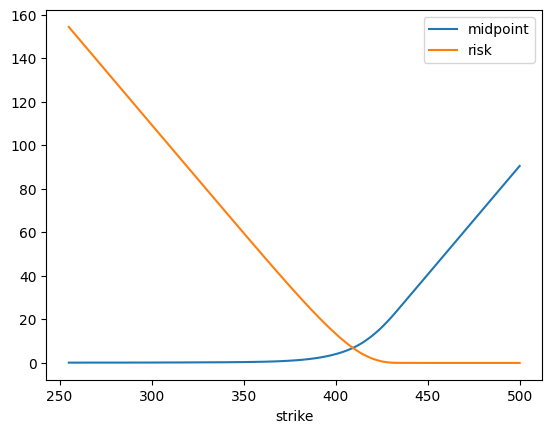

In [61]:
data.loc[lambda x: x.contract_type=='put'].plot(x='strike', y=['midpoint', 'risk'])

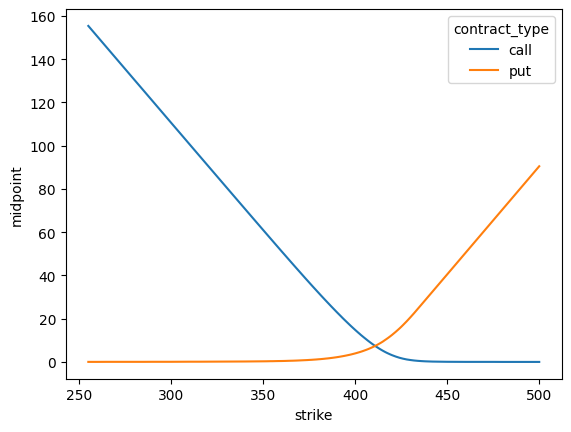

In [10]:
sns.lineplot(data=data, x='strike', y='midpoint', hue='contract_type');

<AxesSubplot: xlabel='strike'>

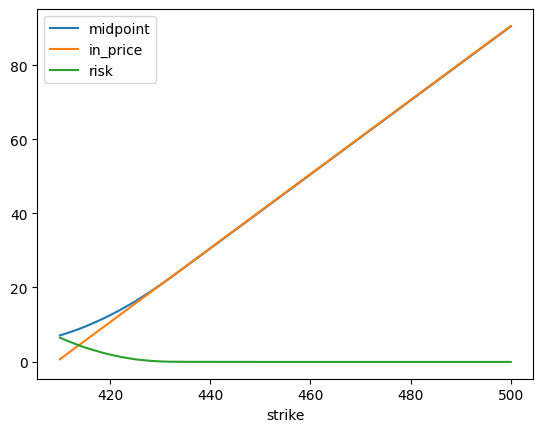

In [49]:
money.loc[lambda x: x.contract_type=='put'].plot(x='strike', y=['midpoint', 'in_price', 'risk'])

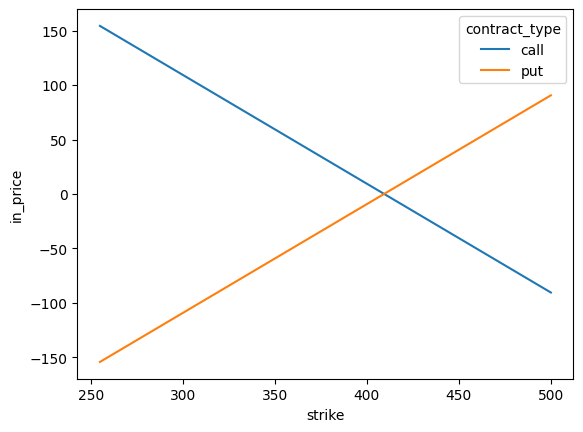

In [29]:
sns.lineplot(data=data, x='strike', y='in_price', hue='contract_type');